In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

setoption = pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# set main color for plots
main_color = '#173F74'


# Import

In [2]:
df_col = pd.read_parquet('../data/processed/ibes-forecasts_collapsed.parquet')

In [3]:
df_col.dropna(subset=["general_analyst_experience_log"])

,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_announce_year,fiscal_year,forecast_horizon,mean_forecast_horizon_days,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,mean_estimate_ijt,general_analyst_experience,general_analyst_experience_log,broker_size,top_10,ticker,sic,broker_coverage,analyst_portfolio_company_complexity_it,analyst_following_jt,analyst_portfolio_industry_complexity_it,surprise,surprise_lag
0,0000,TLMR,TALMER BANCORP,258,8675,0.89000,2015-12-31,2015-12-23,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,112,0.13000,0.14667,0.16679,-0.12063,0.87333,25.00000,3.21888,36,0,0000,60.00000,1,19,6,1,0.16794,0.00000
1,0000,TLMR,TALMER BANCORP,952,50789,1.14000,2014-12-31,2014-11-08,2014-11-07,1.21000,2015-01-30,2014.00000,2014,54 days,182,0.07000,0.40400,0.35750,0.13007,0.80600,19.00000,2.94444,49,0,0000,60.00000,1,43,5,1,0.50124,0.00000
2,0000,TLMR,TALMER BANCORP,1267,71182,1.21000,2014-12-31,2014-11-06,2014-11-05,1.21000,2015-01-30,2014.00000,2014,56 days,182,0.00000,0.14250,0.35750,-0.60140,1.08250,20.00000,2.99573,112,0,0000,60.00000,1,24,5,1,0.11778,0.00000
3,0000,TLMR,TALMER BANCORP,1267,71182,0.90000,2015-12-31,2015-11-10,2015-10-29,1.02000,2016-01-26,2015.00000,2015,63 days,181,0.12000,0.15800,0.16679,-0.05268,0.86200,21.00000,3.04452,124,0,0000,60.00000,1,25,6,1,0.18329,0.11778
4,0000,TLMR,TALMER BANCORP,2500,72481,0.86000,2015-12-31,2015-10-30,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,173,0.16000,0.19800,0.16679,0.18715,0.82200,16.00000,2.77259,7,0,0000,60.00000,1,24,6,1,0.24088,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523614,ZYNX,ZYXI,ZYNEX INC,1549,191964,0.21820,2019-12-31,2019-10-22,2019-10-22,0.25450,2020-02-27,2019.00000,2019,70 days,111,0.03630,0.03175,0.02721,0.16667,0.22275,1.00000,0.00000,41,0,ZYNX,38.00000,1,7,4,5,0.14254,0.00000
523615,ZYNX,ZYXI,ZYNEX INC,1549,191964,0.23640,2020-12-31,2021-02-22,2020-10-28,0.23640,2021-02-25,2020.00000,2020,64 days,176,0.00000,0.05323,0.06722,-0.20809,0.28703,2.00000,0.69315,36,0,ZYNX,38.00000,1,8,5,5,-0.17639,0.14254
523616,ZYNX,ZYXI,ZYNEX INC,1549,191964,0.38180,2021-12-31,2021-11-03,2021-11-03,0.44000,2022-02-24,2021.00000,2021,58 days,169,0.05820,0.10728,0.10170,0.05487,0.33272,3.00000,1.09861,37,0,ZYNX,38.00000,1,14,5,5,0.32243,-0.17639
523617,ZYNX,ZYXI,ZYNEX,1549,191964,0.44000,2022-12-31,2022-10-28,2022-10-28,0.44000,2023-03-13,2022.00000,2022,64 days,197,0.00000,0.00750,0.03587,-0.79089,0.43250,4.00000,1.38629,36,0,ZYNX,38.00000,1,9,5,3,0.01734,0.32243


In [19]:
df_raw = pd.read_parquet('../data/raw/ibes-forecasts.parquet')
df_raw.head()

,TICKER,CUSIP,OFTIC,CNAME,ESTIMATOR,ANALYS,FPI,MEASURE,VALUE,FPEDATS,REVDATS,ANNDATS,ACTUAL,ANNDATS_ACT
0,0000,87482X10,TLMR,TALMER BANCORP,149,119962,1,EPS,0.73000,2014-12-31,2014-03-11,2014-03-09,1.21000,2015-01-30
1,0000,87482X10,TLMR,TALMER BANCORP,228,80474,1,EPS,0.83000,2014-12-31,2014-03-11,2014-03-10,1.21000,2015-01-30
2,0000,87482X10,TLMR,TALMER BANCORP,952,50789,1,EPS,0.66000,2014-12-31,2014-03-11,2014-03-10,1.21000,2015-01-30
3,0000,87482X10,TLMR,TALMER BANCORP,873,79092,1,EPS,0.80000,2014-12-31,2014-03-11,2014-03-10,1.21000,2015-01-30
4,0000,87482X10,TLMR,TALMER BANCORP,1267,71182,1,EPS,0.86000,2014-12-31,2014-04-07,2014-03-17,1.21000,2015-01-30


In [5]:
df_raw.shape

(2517602, 14)

In [6]:
df_raw = df_raw.rename(columns={col: col.lower() for col in df_raw.columns})

In [7]:
def convert_to_datetime(df):
    columns_to_convert = ['fpedats','revdats', "anndats", 'anndats_act']
    for column in columns_to_convert:
        df[column] = pd.to_datetime(df[column])
        
    return df

In [8]:
df_raw = convert_to_datetime(df_raw)

In [9]:
df_raw = df_raw.rename(columns={"ticker": "ibes_ticker_pk", "oftic": "official_ticker", "analys": "analyst", 
                                "value": "estimated_eps", "fpedats": "fiscal_period_ending", 
                                "revdats": "revision_date", "anndats": "announce_date", 
                                "actual": "actual_eps", "anndats_act": "announce_date_actual",
                                "difference_date": "forecast_horizon"})

In [10]:
df_raw["fiscal_year"] = df_raw["fiscal_period_ending"].dt.year

# Uncollapsed

In [11]:
df_raw.shape

(2517602, 15)

In [12]:
def summary_statistics(df):
    """
    This function outputs a summary table with the columns:
    No. of analysts,
    No. of forecasts as the number of rows in the dataframe in year t,
    No. of brokers,
    No. of companies,
    per fiscal year
    """
    
    summary = df.groupby('fiscal_year').agg(
        analysts=('analyst', 'nunique'),
        brokers=('estimator', 'nunique'),
        companies=('ibes_ticker_pk', 'nunique'),
        #industries=("sic", 'nunique')
    )
    return summary

summary_raw = summary_statistics(df_raw) 
summary_raw

# for each year in summary_col[fiscal_year] count the number of rows in df_col
no_forecasts = df_raw.groupby('fiscal_year').size().reset_index(name='forecasts')

# merge
summary_col = pd.merge(summary_raw, no_forecasts, on='fiscal_year')
summary_col




,fiscal_year,analysts,brokers,companies,forecasts
0,2010,4194,382,4745,172978
1,2011,4368,363,4677,180955
2,2012,4276,350,4576,184820
3,2013,4758,411,4864,185767
4,2014,5860,495,5213,197999
5,2015,6043,522,5211,210105
6,2016,5804,497,4972,200973
7,2017,5524,472,4879,192164
8,2018,5154,449,4824,187381
9,2019,4828,434,4863,182151


In [13]:
# total number of distinct analysts, brokers and companies over all years
total_analysts = df_raw['analyst'].nunique()
total_brokers = df_raw['estimator'].nunique()
total_companies = df_raw['ibes_ticker_pk'].nunique()
total_forecasts = df_raw.shape[0]

total_analysts, total_brokers, total_companies, total_forecasts

(13913, 908, 9640, 2517602)

# Collapsed


## Summary Table

- How many distinct analysts in total
- How many distinct brokerages in total
- How many forecasts in total (rows)
- How many distinct analysts per year
- How many distinct brokerages per year
- How many forecasts per year (rows)

In [3]:
df_col.head()

,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_announce_year,fiscal_year,forecast_horizon,mean_forecast_horizon_days,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,mean_estimate_ijt,general_analyst_experience,general_analyst_experience_log,broker_size,top_10,ticker,sic,broker_coverage,analyst_portfolio_company_complexity_it,analyst_following_jt,analyst_portfolio_industry_complexity_it,surprise,surprise_lag
0,0000,TLMR,TALMER BANCORP,258,8675,0.89000,2015-12-31,2015-12-23,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,112,0.13000,0.14667,0.16679,-0.12063,0.87333,25.00000,3.21888,36,0,0000,60.00000,1,19,6,1,0.16794,0.00000
1,0000,TLMR,TALMER BANCORP,952,50789,1.14000,2014-12-31,2014-11-08,2014-11-07,1.21000,2015-01-30,2014.00000,2014,54 days,182,0.07000,0.40400,0.35750,0.13007,0.80600,19.00000,2.94444,49,0,0000,60.00000,1,43,5,1,0.50124,0.00000
2,0000,TLMR,TALMER BANCORP,1267,71182,1.21000,2014-12-31,2014-11-06,2014-11-05,1.21000,2015-01-30,2014.00000,2014,56 days,182,0.00000,0.14250,0.35750,-0.60140,1.08250,20.00000,2.99573,112,0,0000,60.00000,1,24,5,1,0.11778,0.00000
3,0000,TLMR,TALMER BANCORP,1267,71182,0.90000,2015-12-31,2015-11-10,2015-10-29,1.02000,2016-01-26,2015.00000,2015,63 days,181,0.12000,0.15800,0.16679,-0.05268,0.86200,21.00000,3.04452,124,0,0000,60.00000,1,25,6,1,0.18329,0.11778
4,0000,TLMR,TALMER BANCORP,2500,72481,0.86000,2015-12-31,2015-10-30,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,173,0.16000,0.19800,0.16679,0.18715,0.82200,16.00000,2.77259,7,0,0000,60.00000,1,24,6,1,0.24088,0.00000


In [4]:
def summary_statistics(df):
    """
    This function outputs a summary table with the columns:
    No. of analysts,
    No. of forecasts as the number of rows in the dataframe in year t,
    No. of brokers,
    No. of companies,
    per fiscal year
    """
    
    summary = df.groupby('fiscal_year').agg(
        analysts=('analyst', 'nunique'),
        brokers=('estimator', 'nunique'),
        companies=('ibes_ticker_pk', 'nunique'),
        #industries=("sic", 'nunique')
    )
    return summary

summary_col = summary_statistics(df_col) 
summary_col

# for each year in summary_col[fiscal_year] count the number of rows in df_col
no_forecasts = df_col.groupby('fiscal_year').size().reset_index(name='forecasts')

# merge
summary_col = pd.merge(summary_col, no_forecasts, on='fiscal_year')
summary_col

,fiscal_year,analysts,brokers,companies,forecasts
0,2010,3823,345,3931,35125
1,2011,4064,337,3851,37322
2,2012,4003,320,3879,38333
3,2013,3945,326,3997,38790
4,2014,4074,339,4163,39977
5,2015,4044,345,4201,40139
6,2016,3905,344,4057,38697
7,2017,3744,335,3984,37099
8,2018,3626,326,4009,36370
9,2019,3547,304,4061,36086


In [5]:
# total number of distinct analysts, brokers and companies over all years
total_analysts = df_col['analyst'].nunique()
total_brokers = df_col['estimator'].nunique()
total_companies = df_col['ibes_ticker_pk'].nunique()
total_forecasts = df_col.shape[0]

total_analysts, total_brokers, total_companies, total_forecasts

(10742, 708, 7962, 490212)

# PMAFE 

In [22]:
df_col["pmafe"].describe()

count   490212.00000
mean         0.01024
std          0.67678
min         -1.00000
25%         -0.30182
50%         -0.05065
75%          0.17673
max         67.00421
Name: pmafe, dtype: float64

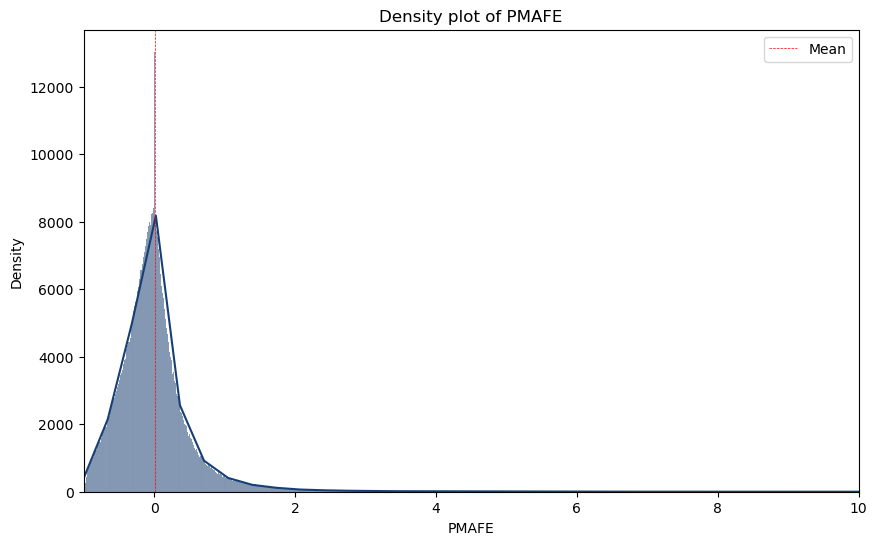

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df_col["pmafe"], kde=True, bins=5000, color=main_color)
plt.title("Density plot of PMAFE")
plt.xlabel("PMAFE")
plt.ylabel("Density")
plt.xlim(-1, 10)

# Add a thinner line for the mean
mean_pmafe = df_col["pmafe"].mean()
plt.axvline(mean_pmafe, color='red', linestyle='--', linewidth=0.5, label='Mean')

plt.legend()
plt.show()

# Hypotheses 1
Does increased analyst coverage positively correlate with accuracy?

- Broker_size distribution 
- Top 10 plot
- Broker coverage

In [14]:
df_col.head()

,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_announce_year,fiscal_year,forecast_horizon,mean_forecast_horizon_days,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,mean_estimate_ijt,general_analyst_experience,general_analyst_experience_log,broker_size,top_10,ticker,sic,broker_coverage,analyst_portfolio_company_complexity_it,analyst_following_jt,analyst_portfolio_industry_complexity_it,surprise,surprise_lag
0,0000,TLMR,TALMER BANCORP,258,8675,0.89000,2015-12-31,2015-12-23,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,112,0.13000,0.14667,0.16679,-0.12063,0.87333,25.00000,3.21888,36,0,0000,60.00000,1,19,6,1,0.16794,0.00000
1,0000,TLMR,TALMER BANCORP,952,50789,1.14000,2014-12-31,2014-11-08,2014-11-07,1.21000,2015-01-30,2014.00000,2014,54 days,182,0.07000,0.40400,0.35750,0.13007,0.80600,19.00000,2.94444,49,0,0000,60.00000,1,43,5,1,0.50124,0.00000
2,0000,TLMR,TALMER BANCORP,1267,71182,1.21000,2014-12-31,2014-11-06,2014-11-05,1.21000,2015-01-30,2014.00000,2014,56 days,182,0.00000,0.14250,0.35750,-0.60140,1.08250,20.00000,2.99573,112,0,0000,60.00000,1,24,5,1,0.11778,0.00000
3,0000,TLMR,TALMER BANCORP,1267,71182,0.90000,2015-12-31,2015-11-10,2015-10-29,1.02000,2016-01-26,2015.00000,2015,63 days,181,0.12000,0.15800,0.16679,-0.05268,0.86200,21.00000,3.04452,124,0,0000,60.00000,1,25,6,1,0.18329,0.11778
4,0000,TLMR,TALMER BANCORP,2500,72481,0.86000,2015-12-31,2015-10-30,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,173,0.16000,0.19800,0.16679,0.18715,0.82200,16.00000,2.77259,7,0,0000,60.00000,1,24,6,1,0.24088,0.00000


In [8]:
# table of unique estimators in year 2019 and their broker_size
estimators_2022 = df_col[df_col['fiscal_year'] == 2022].groupby('estimator')['broker_size'].first().reset_index()
estimators_2022

,estimator,broker_size
0,11,18
1,22,2
2,28,1
3,29,55
4,31,67
...,...,...
309,4554,1
310,4555,1
311,4560,1
312,4562,1


In [12]:
# # generate list of top 10 % broker_size thresholds per fiscal year
top_10_thresholds = df_col.groupby('fiscal_year')['broker_size'].quantile(0.90).reset_index()
th_2022 = top_10_thresholds[top_10_thresholds["fiscal_year"]==2022]

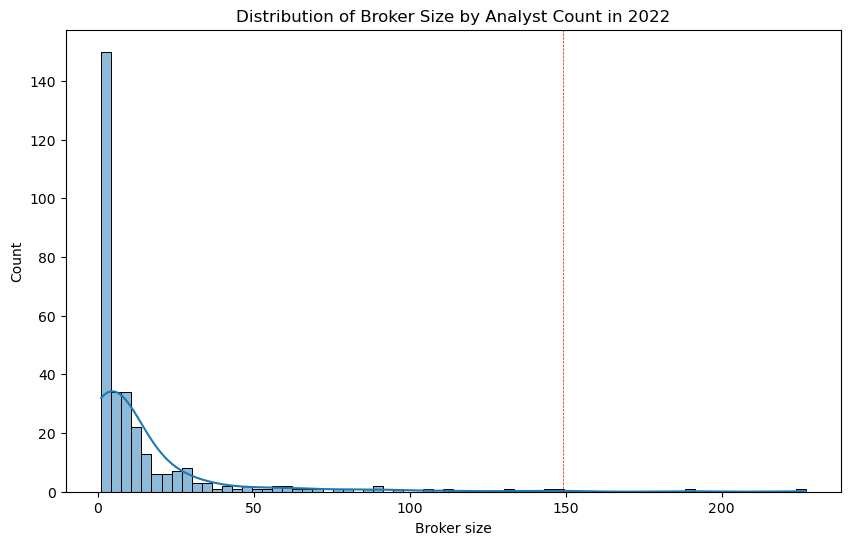

In [13]:
# from estimators_2019 plot a histogram of broker_size and add the threshold decentile 0.9 threshold
plt.figure(figsize=(10, 6))
sns.histplot(estimators_2022['broker_size'], kde=True)
plt.title('Distribution of Broker Size by Analyst Count in 2022')
plt.xlabel('Broker size')
plt.ylabel('Count')
# vertical line at 148 
plt.axvline(th_2022['broker_size'].values[0], color='red', linestyle='--', linewidth=0.5, label='90th percentile')
#ylim = plt.ylim(0,25)
plt.grid(False) 
plt.show()

In [26]:
# calculate the median_forecast_error per broker_coverage value and add the number of entries per broker_coverage
median_forecast_error_coverage = df_col.groupby('broker_coverage').agg(
    median_forecast_error=('afe_firm_jt_mean', 'median'),
    no_entries=('broker_coverage', 'size')
).reset_index()

median_forecast_error_coverage

,broker_coverage,median_forecast_error,no_entries
0,1,0.22671,436428
1,2,0.24536,49823
2,3,0.26514,3792
3,4,0.21508,164
4,5,0.29027,5


In [30]:
df_col["analyst_following_jt"].describe()

count   490212.00000
mean        16.32678
std         10.53356
min          1.00000
25%          8.00000
50%         14.00000
75%         23.00000
max         64.00000
Name: analyst_following_jt, dtype: float64

In [34]:
# calculate the mean_forecst_error per analyst_following value and add the number of entries per analyst_following
mean_forecast_error_following = df_col.groupby('analyst_following_jt').agg(
    mean_forecast_error=('pmafe', 'mean'),
    no_entries=('analyst_following_jt', 'size')
).reset_index()
mean_forecast_error_following

,analyst_following_jt,mean_forecast_error,no_entries
0,1,0.00000,4402
1,2,0.02427,9624
2,3,0.01977,13949
3,4,0.01099,18795
4,5,0.01402,21279
...,...,...,...
58,59,-0.06422,118
59,60,-0.02879,240
60,62,0.02896,124
61,63,-0.03793,63


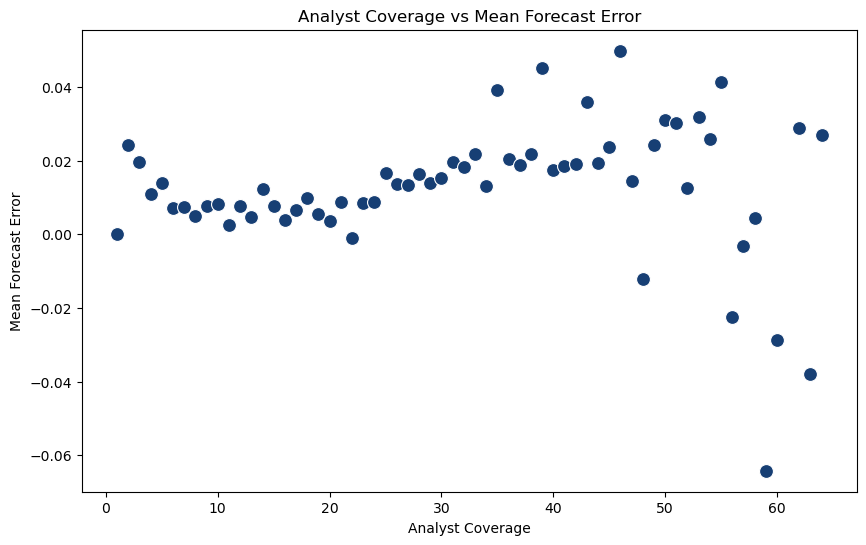

In [35]:
# plot analyst coverage vs mean forecast error
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_forecast_error_following, x='analyst_following_jt', y='mean_forecast_error', s=100, color=main_color)
plt.title('Analyst Coverage vs Mean Forecast Error')
plt.xlabel('Analyst Coverage')
plt.ylabel('Mean Forecast Error')
plt.show()

# Hypothese 2
Does the breadth of industries or companies followed by analysts negatively influence the accuracy of their predictions?



In [36]:
df_col.head()

,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_announce_year,fiscal_year,forecast_horizon,mean_forecast_horizon_days,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,mean_estimate_ijt,general_analyst_experience,general_analyst_experience_log,broker_size,top_10,ticker,sic,broker_coverage,analyst_portfolio_company_complexity_it,analyst_following_jt,analyst_portfolio_industry_complexity_it,surprise,surprise_lag
0,0000,TLMR,TALMER BANCORP,258,8675,0.89000,2015-12-31,2015-12-23,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,112,0.13000,0.14667,0.16679,-0.12063,0.87333,25.00000,3.21888,36,0,0000,60.00000,1,19,6,1,0.16794,0.00000
1,0000,TLMR,TALMER BANCORP,952,50789,1.14000,2014-12-31,2014-11-08,2014-11-07,1.21000,2015-01-30,2014.00000,2014,54 days,182,0.07000,0.40400,0.35750,0.13007,0.80600,19.00000,2.94444,49,0,0000,60.00000,1,43,5,1,0.50124,0.00000
2,0000,TLMR,TALMER BANCORP,1267,71182,1.21000,2014-12-31,2014-11-06,2014-11-05,1.21000,2015-01-30,2014.00000,2014,56 days,182,0.00000,0.14250,0.35750,-0.60140,1.08250,20.00000,2.99573,112,0,0000,60.00000,1,24,5,1,0.11778,0.00000
3,0000,TLMR,TALMER BANCORP,1267,71182,0.90000,2015-12-31,2015-11-10,2015-10-29,1.02000,2016-01-26,2015.00000,2015,63 days,181,0.12000,0.15800,0.16679,-0.05268,0.86200,21.00000,3.04452,124,0,0000,60.00000,1,25,6,1,0.18329,0.11778
4,0000,TLMR,TALMER BANCORP,2500,72481,0.86000,2015-12-31,2015-10-30,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,173,0.16000,0.19800,0.16679,0.18715,0.82200,16.00000,2.77259,7,0,0000,60.00000,1,24,6,1,0.24088,0.00000


In [49]:
grouped_by_analyst = df_col.groupby(['analyst'])['analyst_portfolio_company_complexity_it'].count().reset_index()
grouped_by_analyst = grouped_by_analyst.drop(grouped_by_analyst[grouped_by_analyst['analyst'] == 0].index)
grouped_by_analyst

,analyst,analyst_portfolio_company_complexity_it
1,1,23
2,29,37
3,70,178
4,71,34
5,83,8
...,...,...
10737,199313,1
10738,199323,9
10739,199349,1
10740,199370,2


In [52]:
df_col.head()

,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_announce_year,fiscal_year,forecast_horizon,mean_forecast_horizon_days,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,mean_estimate_ijt,general_analyst_experience,general_analyst_experience_log,broker_size,top_10,ticker,sic,broker_coverage,analyst_portfolio_company_complexity_it,analyst_following_jt,analyst_portfolio_industry_complexity_it,surprise,surprise_lag
0,0000,TLMR,TALMER BANCORP,258,8675,0.89000,2015-12-31,2015-12-23,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,112,0.13000,0.14667,0.16679,-0.12063,0.87333,25.00000,3.21888,36,0,0000,60.00000,1,19,6,1,0.16794,0.00000
1,0000,TLMR,TALMER BANCORP,952,50789,1.14000,2014-12-31,2014-11-08,2014-11-07,1.21000,2015-01-30,2014.00000,2014,54 days,182,0.07000,0.40400,0.35750,0.13007,0.80600,19.00000,2.94444,49,0,0000,60.00000,1,43,5,1,0.50124,0.00000
2,0000,TLMR,TALMER BANCORP,1267,71182,1.21000,2014-12-31,2014-11-06,2014-11-05,1.21000,2015-01-30,2014.00000,2014,56 days,182,0.00000,0.14250,0.35750,-0.60140,1.08250,20.00000,2.99573,112,0,0000,60.00000,1,24,5,1,0.11778,0.00000
3,0000,TLMR,TALMER BANCORP,1267,71182,0.90000,2015-12-31,2015-11-10,2015-10-29,1.02000,2016-01-26,2015.00000,2015,63 days,181,0.12000,0.15800,0.16679,-0.05268,0.86200,21.00000,3.04452,124,0,0000,60.00000,1,25,6,1,0.18329,0.11778
4,0000,TLMR,TALMER BANCORP,2500,72481,0.86000,2015-12-31,2015-10-30,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,173,0.16000,0.19800,0.16679,0.18715,0.82200,16.00000,2.77259,7,0,0000,60.00000,1,24,6,1,0.24088,0.00000


In [60]:
# pmafe per analyst_portfolio_company_complexity_it of grouped_by_analyst
afe_per_complexity = df_col.groupby('analyst_portfolio_company_complexity_it')['mean_estimate_ijt'].median().reset_index()
afe_per_complexity


,analyst_portfolio_company_complexity_it,mean_estimate_ijt
0,1,1.37250
1,2,1.44312
2,3,1.51528
3,4,1.53690
4,5,1.42000
...,...,...
72,80,1.60200
73,81,-1.66750
74,98,3.42533
75,135,3.29000


In [59]:
# pmafe per analyst_portfolio_company_complexity_it of grouped_by_analyst
afe_per_complexity_sic = df_col.groupby('analyst_portfolio_industry_complexity_it')['mean_estimate_ijt'].median().reset_index()
afe_per_complexity_sic

,analyst_portfolio_industry_complexity_it,mean_estimate_ijt
0,1,1.20000
1,2,1.52200
2,3,1.66183
3,4,1.79500
4,5,1.79937
5,6,1.83812
6,7,1.87500
7,8,1.98333
8,9,2.03000
9,10,1.75000


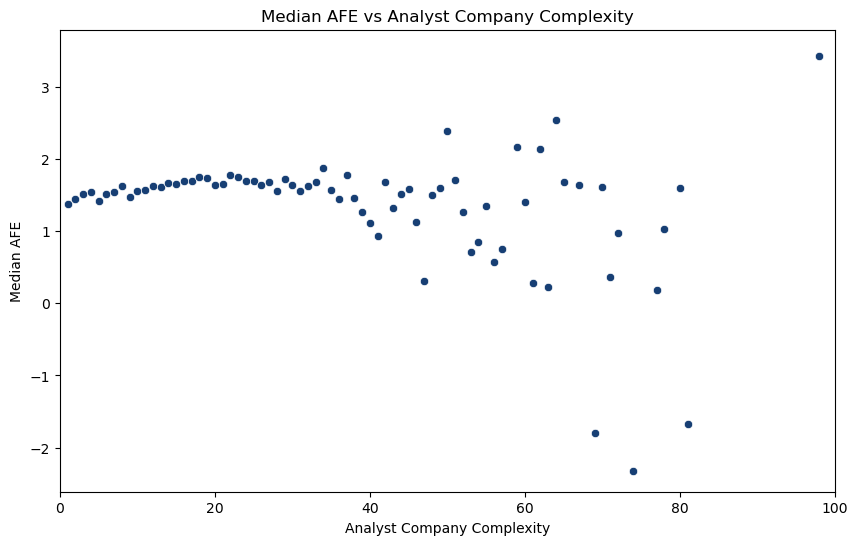

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=afe_per_complexity, x='analyst_portfolio_company_complexity_it', y='mean_estimate_ijt', color=main_color)
plt.title('Median AFE vs Analyst Company Complexity')
plt.xlabel('Analyst Company Complexity')
plt.ylabel('Median AFE')
# restrict x-axis to 0-100
plt.xlim(0, 100)
plt.show()


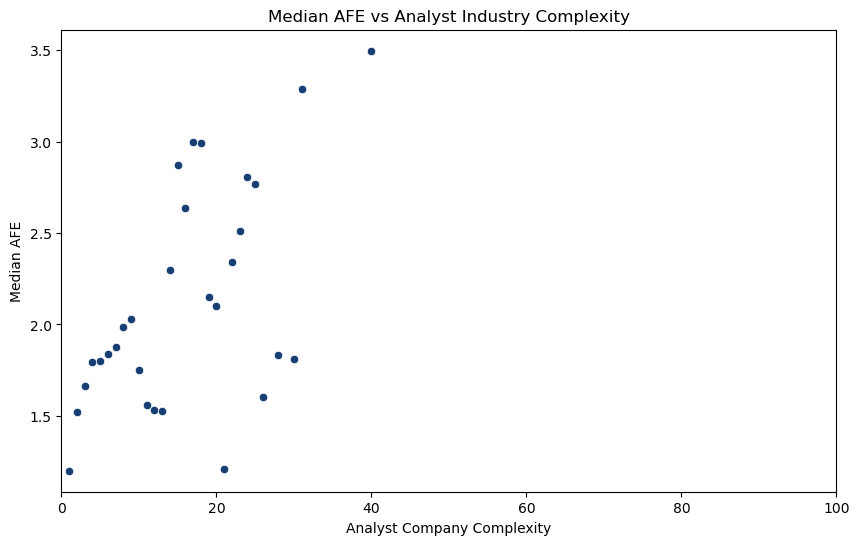

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=afe_per_complexity_sic, x='analyst_portfolio_industry_complexity_it', y='mean_estimate_ijt', color=main_color)
plt.title('Median AFE vs Analyst Industry Complexity')
plt.xlabel('Analyst Company Complexity')
plt.ylabel('Median AFE')
# restrict x-axis to 0-100
plt.xlim(0, 100)
plt.show()


# Hypothese 3
- general experience grouped median AFE
- surprise lag per median AFE

In [69]:
df_col.head()

,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_announce_year,fiscal_year,forecast_horizon,mean_forecast_horizon_days,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,mean_estimate_ijt,general_analyst_experience,general_analyst_experience_log,broker_size,top_10,ticker,sic,broker_coverage,analyst_portfolio_company_complexity_it,analyst_following_jt,analyst_portfolio_industry_complexity_it,surprise,surprise_lag
0,0000,TLMR,TALMER BANCORP,258,8675,0.89000,2015-12-31,2015-12-23,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,112,0.13000,0.14667,0.16679,-0.12063,0.87333,25.00000,3.21888,36,0,0000,60.00000,1,19,6,1,0.16794,0.00000
1,0000,TLMR,TALMER BANCORP,952,50789,1.14000,2014-12-31,2014-11-08,2014-11-07,1.21000,2015-01-30,2014.00000,2014,54 days,182,0.07000,0.40400,0.35750,0.13007,0.80600,19.00000,2.94444,49,0,0000,60.00000,1,43,5,1,0.50124,0.00000
2,0000,TLMR,TALMER BANCORP,1267,71182,1.21000,2014-12-31,2014-11-06,2014-11-05,1.21000,2015-01-30,2014.00000,2014,56 days,182,0.00000,0.14250,0.35750,-0.60140,1.08250,20.00000,2.99573,112,0,0000,60.00000,1,24,5,1,0.11778,0.00000
3,0000,TLMR,TALMER BANCORP,1267,71182,0.90000,2015-12-31,2015-11-10,2015-10-29,1.02000,2016-01-26,2015.00000,2015,63 days,181,0.12000,0.15800,0.16679,-0.05268,0.86200,21.00000,3.04452,124,0,0000,60.00000,1,25,6,1,0.18329,0.11778
4,0000,TLMR,TALMER BANCORP,2500,72481,0.86000,2015-12-31,2015-10-30,2015-10-30,1.02000,2016-01-26,2015.00000,2015,62 days,173,0.16000,0.19800,0.16679,0.18715,0.82200,16.00000,2.77259,7,0,0000,60.00000,1,24,6,1,0.24088,0.00000


In [87]:
# group general_analyst_experience by analyst and calculate median of afe
grouped_by_analyst = df_col.groupby(['general_analyst_experience'])['mean_estimate_ijt'].median().reset_index()
grouped_by_analyst_count = df_col.groupby(['general_analyst_experience'])['mean_estimate_ijt'].count().reset_index()

grouped_by_analyst = grouped_by_analyst[grouped_by_analyst['general_analyst_experience'] <= 32]
grouped_by_analyst_count = grouped_by_analyst_count[grouped_by_analyst_count['general_analyst_experience'] <= 32]

# merge the two dataframes
grouped_by_analyst = pd.merge(grouped_by_analyst, grouped_by_analyst_count, on='general_analyst_experience')


In [89]:
grouped_by_analyst

,general_analyst_experience,mean_estimate_ijt_x,mean_estimate_ijt_y
0,0.00000,1.42000,21100
1,1.00000,1.44000,29285
2,2.00000,1.47613,27662
3,3.00000,1.50656,26254
4,4.00000,1.51530,24960
5,5.00000,1.48600,23327
6,6.00000,1.52500,22287
7,7.00000,1.57600,21493
8,8.00000,1.59286,20485
9,9.00000,1.56000,19952


In [88]:
grouped_by_analyst_count

,general_analyst_experience,mean_estimate_ijt
0,0.00000,21100
1,1.00000,29285
2,2.00000,27662
3,3.00000,26254
4,4.00000,24960
5,5.00000,23327
6,6.00000,22287
7,7.00000,21493
8,8.00000,20485
9,9.00000,19952


In [77]:
grouped_by_analyst

,general_analyst_experience,mean_estimate_ijt
0,0.00000,1.42000
1,1.00000,1.44000
2,2.00000,1.47613
3,3.00000,1.50656
4,4.00000,1.51530
5,5.00000,1.48600
6,6.00000,1.52500
7,7.00000,1.57600
8,8.00000,1.59286
9,9.00000,1.56000


In [ ]:
# plot general_analyst_experience vs median afe and the a bar chart with the number of 

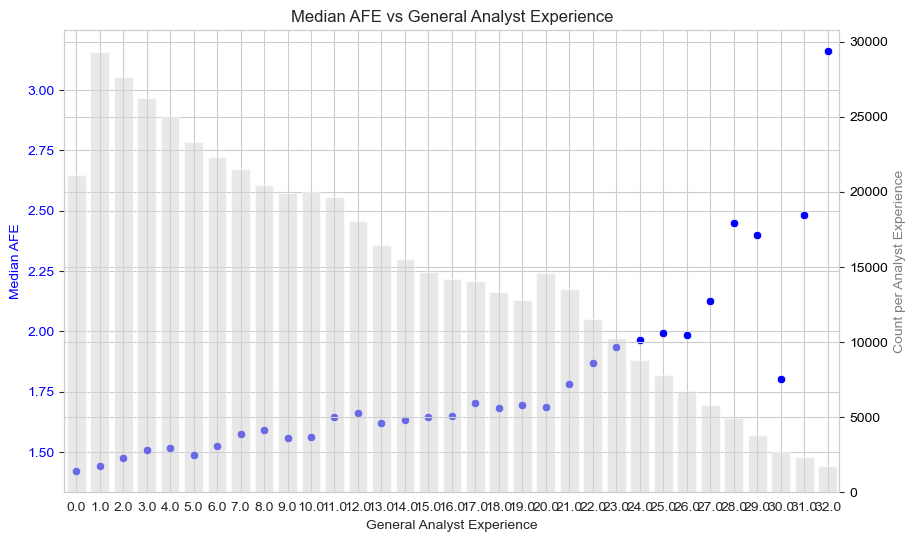

In [94]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot scatter plot on first y-axis
sns.scatterplot(data=grouped_by_analyst, x='general_analyst_experience', y='mean_estimate_ijt_x', color='blue', ax=ax1)

# Set labels and title for first y-axis
ax1.set_xlabel('General Analyst Experience')
ax1.set_ylabel('Median AFE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot bar chart on second y-axis
sns.barplot(data=grouped_by_analyst, x='general_analyst_experience', y='mean_estimate_ijt_y', color='lightgrey', alpha=0.5, ax=ax2)

# Set labels and title for second y-axis
ax2.set_ylabel('Count per Analyst Experience', color='grey')
ax2.tick_params(axis='y', labelcolor='black')

# Set title for the plot
plt.title('Median AFE vs General Analyst Experience')

# Show the plot
plt.show()

# Hypotheses 4
Does the occurrence of Covid affect the accuracy of analysts' forecasts?


In [15]:
median_forecast_error = df_col.groupby('fiscal_period_ending')['afe_firm_jt_mean'].median().reset_index(name='mean_forecast_error')
median_forecast_error

,fiscal_period_ending,mean_forecast_error
0,2010-02-28,0.15833
1,2010-03-31,0.05571
2,2010-04-30,0.08533
3,2010-05-31,0.05353
4,2010-06-30,0.13045
...,...,...
150,2022-08-31,0.46479
151,2022-09-30,0.27082
152,2022-10-31,0.38373
153,2022-11-30,0.45447


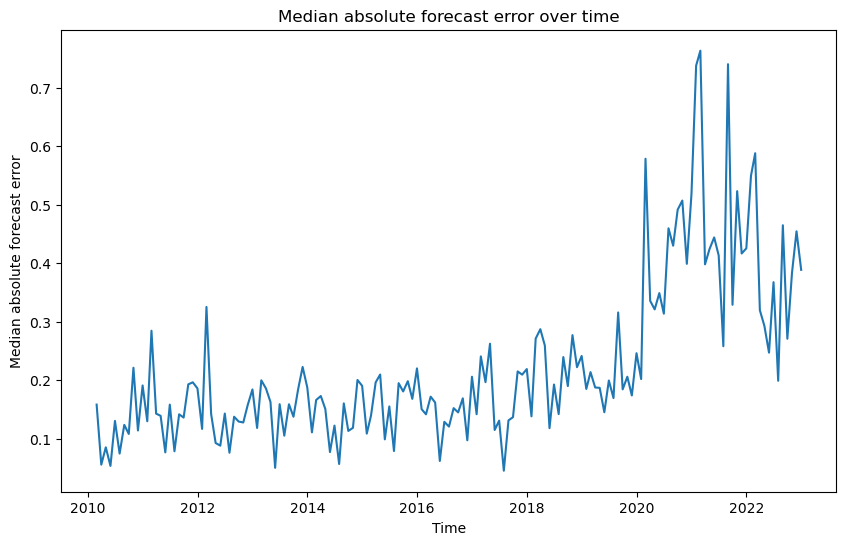

In [17]:
# plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=median_forecast_error, x='fiscal_period_ending', y='mean_forecast_error')
plt.title('Median absolute forecast error over time')
plt.xlabel('Time')
plt.ylabel('Median absolute forecast error')
plt.show()